In [ ]:
N GRAMS

In [ ]:
from pathlib import Path
from sys import argv
import os

path = 'C:\\Users\\kherr\\Dalhousie\\Thesis\\MIDI\\'

for file in os.listdir(path):
    print('Changing', file,'to')
    os.rename(path + file, path + file.lower())
    



print('Downcases the names of all directories inside the current directory.DONE')

for folders in os.listdir(path):
    print(folders)
    x=0
    for file in os.listdir(path+folders):
        print('Changing', file,'to')
        dst=f"{folders}"
        src =f"{path+folders}/{file}"  # foldername/filename, if .py file is outside folder
        dst =f"{path+folders}/{dst}_{x}.mid"
        os.rename(src, dst)
        x=x+1

print("NORMALIZING FOLDER NAMES DONE")

Changing albeniz to
Changing beeth to
Changing brahms to
Changing chopin to
Changing grieg to
Changing haydn to
Changing liszt to
Changing mendelssohn to
Changing mozart to
Changing schubert to
Changing schumann to
Changing tschai to
Downcases the names of all directories inside the current directory.DONE
albeniz
Changing alb_esp1.mid to
Changing alb_esp2.mid to
Changing alb_esp3.mid to
Changing alb_esp4.mid to
Changing alb_esp5.mid to
Changing alb_esp6.mid to
Changing alb_se1.mid to
Changing alb_se2.mid to
Changing alb_se3.mid to
Changing alb_se4.mid to
Changing alb_se5.mid to
Changing alb_se6.mid to
Changing alb_se7.mid to
Changing alb_se8.mid to
beeth
Changing appass_1.mid to
Changing appass_2.mid to
Changing appass_3.mid to
Changing beethoven_hammerklavier_1.mid to
Changing beethoven_hammerklavier_2.mid to
Changing beethoven_hammerklavier_3.mid to
Changing beethoven_hammerklavier_4.mid to
Changing beethoven_les_adieux_1.mid to
Changing beethoven_les_adieux_2.mid to
Changing beethov

In [ ]:
import os
path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\MIDI\\'
for folders in os.listdir(path):
    
        path1='C:\\Users\\kherr\\Dalhousie\\Thesis\\NGRAMS\\'
        os.mkdir(f'{path1+folders}') 
        #path2='C:\\Users\\kherr\\Dalhousie\\Thesis\\FreqRank\\'
        #os.mkdir(f'{path2+folders}')

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path




def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x

%matplotlib inline

   
path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\MIDI\\'

for folders in os.listdir(path):
    l=0
    n_grams= torch.zeros([100000,2])
    for file in os.listdir(path+folders):
        without_file_extension = Path(file).stem
        x=0
        address=f"{path+folders}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
        #print(l)
        #print("PITCH AND DURATION")
        #print(s)
        #print("s for file=",f"{address}",s[:l,:])
        #print("last two rows",s[l-2:l,:])
        j=0
        for i in range(l,l+leng):
        
            if(i<((l+leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[j+1][0]-s[j][0]
                #print(s[i+1][1])
                #t=math.log2(s[i+1][1])
                #print()
                n_grams[i][1]=round(math.log2(s[j+1][1]/s[j][1]))
                j=j+1
                
        #print("n grams=",f"{address}",n_grams)
        l=l+leng
        print("Calculating for ",f'{path1+folders}\{without_file_extension}',".midi")
    
    temp=n_grams.numpy()
    temp=temp[:l,:]
    print("n_grams for",folders,"=",temp)
    temp = pd.DataFrame(temp)
    print("Length of ",folders,"is=",temp.shape) 
    path1='C:\\Users\\kherr\\Dalhousie\\Thesis\\NGRAMS\\'
    print(f'{path1+folders}\{folders}-NGRAMS.csv')
    temp.to_csv(f'{path1+folders}\{folders}-NGRAMS.csv',index=False)
      

Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_0 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_1 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_2 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_3 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_4 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_5 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_6 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_7 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_8 .midi
Calculating for  C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz_9 .midi
n_grams for albeniz = [[ 7.  3.]
 [-2. -5.]
 [ 2.  0.]
 ...
 [ 7.  0.]
 [ 5.  0.]
 [ 0.  0.]]
Length of  albeniz is= (15343, 2)
C:\Users\kherr\Dalhousie\Thesis\NGRAMS\albeniz\albeniz-NGRAMS.csv
Calcul

In [ ]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path
composers= torch.zeros([12,1])
composers[0][0]= 15343
composers[1][0]= 48463
composers[2][0]= 26359
composers[3][0]= 9335
composers[4][0]= 12515
composers[5][0]= 19172
composers[6][0]= 54710
composers[7][0]= 14865
composers[8][0]= 35550
composers[9][0]=53724
composers[10][0]=9724
composers[11][0]=15802
#print("composer length=",composers)
from numpy import genfromtxt
composers=composers.numpy()
#print(composers)
my_data ='C:\\Users\\kherr\\Dalhousie\\Thesis\\NGRAMS\\'

#print(data[:15343][:])


j=0
for folders in os.listdir(my_data):
    print(folders)
    
    for file in os.listdir(my_data+folders):
        print(file)
        data=pd.read_csv(f'{my_data+folders}\{file}')
        data=data.to_numpy()
        print(data)
        print("DATA",data.shape)
        print("Composer",composers[j][0])
        for n in range(2,13):
            os.mkdir(f'{my_data+folders}/{n}')
            #rhythm=torch.zeros([100000,n])
            #melody=torch.zeros([100000,n])
            #comb=torch.zeros([100000,n+n])
            rhythm=torch.zeros([int(composers[j][0]-(n-1)),n])
            melody=torch.zeros([int(composers[j][0]-(n-1)),n])
            comb=torch.zeros([int(composers[j][0]-(n-1)),n+n])
            print(n,"-GRAMS")
            for i in range(int(composers[j][0])-(n-1)):
                #print("i=",i)
                
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
                
            print("Rhythm",rhythm)
            print("Melody",melody)
            print("Comb",comb)
    
            rhythm= pd.DataFrame(rhythm.numpy())
            melody= pd.DataFrame(melody.numpy())
            comb= pd.DataFrame(comb.numpy())
            rhythm.to_csv(f'{my_data+folders}\{n}\{file}-{n}-n-rhythm.csv',index=False)
            melody.to_csv(f'{my_data+folders}\{n}\{file}-{n}-n-melody.csv',index=False)
            comb.to_csv(f'{my_data+folders}\{n}\{file}-{n}-n-comb.csv',index=False)
        j=j+1

albeniz
albeniz-NGRAMS.csv
[[ 7.  3.]
 [-2. -5.]
 [ 2.  0.]
 ...
 [ 7.  0.]
 [ 5.  0.]
 [ 0.  0.]]
DATA (15343, 2)
Composer 15343.0
2 -GRAMS
Rhythm tensor([[ 3., -5.],
        [-5.,  0.],
        [ 0.,  2.],
        ...,
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]])
Melody tensor([[  7.,  -2.],
        [ -2.,   2.],
        [  2.,  -2.],
        ...,
        [-43.,   7.],
        [  7.,   5.],
        [  5.,   0.]])
Comb tensor([[  7.,  -2.,   3.,  -5.],
        [ -2.,   2.,  -5.,   0.],
        [  2.,  -2.,   0.,   2.],
        ...,
        [-43.,   7.,   0.,   0.],
        [  7.,   5.,   0.,   0.],
        [  5.,   0.,   0.,   0.]])
3 -GRAMS
Rhythm tensor([[ 3., -5.,  0.],
        [-5.,  0.,  2.],
        [ 0.,  2.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])
Melody tensor([[  7.,  -2.,   2.],
        [ -2.,   2.,  -2.],
        [  2.,  -2.,  -2.],
        ...,
        [  7., -43.,   7.],
        [-43.,   7.,   5.],
  

In [ ]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path
from operator import itemgetter



composers= torch.zeros([12,1])
composers[0][0]= 15343
composers[1][0]= 48463
composers[2][0]= 26359







my_data ='C:\\Users\\kherr\\Dalhousie\\Thesis\\NGRAMS\\'


for folders in os.listdir(my_data):
    i=0
    print("FOLDERS=>",folders)
    os.mkdir(f'{my_data+folders}\RANK')
    for n in range(2,13):
            os.mkdir(f'{my_data+folders}\RANK\{n}')
        #for file in os.listdir(my_data+folders):
            #print("FILE=>",file)
        
            
            print("N=",n)
            rhythm=pd.read_csv(f'{my_data+folders}\{n}\{folders}-NGRAMS.csv-{n}-n-rhythm.csv')
            rhythm=rhythm.to_numpy()
            #print("WITH ZER0",rhythm.shape)
            #lr,b=rhythm.shape
            #rhythm=rhythm[~np.all(rhythm == 0, axis=1)]
            lr,b=rhythm.shape
            #print("WITHOUT ZERO",rhythm.shape)
            #print("RRRRR")
            #freq=rank(rhythm,lr,n,0)
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            #print(unique)
            #print(counts.T)
            freq=np.c_[unique, counts].astype(int)
            
            a = sorted(freq, key=itemgetter(n),reverse=True)
            
            a=np.array(a)
            #print("Sorted RHythm=",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
           
            freq= pd.DataFrame(a)
            freq.to_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-RHYTHM_RANK.csv',index=False)
           
            #print("A=",a)
            
        
            
            
            
            
            melody=pd.read_csv(f'{my_data+folders}\{n}\{folders}-NGRAMS.csv-{n}-n-melody.csv')
            melody=melody.to_numpy()
            #print("WITH ZER0",melody.shape)
            lm,b=melody.shape
            #melody=melody[~np.all(melody == 0, axis=1)]
            #print("WITHOUT ZERO",melody.shape)
            #lm,b=melody.shape
            #freq=rank(melody,lm,n,0)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            #print(np.asarray((melody, counts)))
            #print(np.c_[unique, counts])
            freq=np.c_[unique, counts].astype(int)
            #print("Melody",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            a=np.array(a)
            freq= pd.DataFrame(a)
            #print("MMMMM")
            #print(freq)
            freq= pd.DataFrame(a)
            freq.to_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-MELODY_RANK.csv',index=False)
            
            
            
            
            comb=pd.read_csv(f'{my_data+folders}\{n}\{folders}-NGRAMS.csv-{n}-n-comb.csv')
            comb=comb.to_numpy()   
            #print("WITH ZER0",comb.shape)
            #lc,b=comb.shape
            #comb=comb[~np.all(comb == 0, axis=1)]
            lc,b=comb.shape
            #print("WITHOUT ZERO",comb.shape)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            #print(np.asarray((unique, counts)))
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(comb,lc,n,1)
            a = sorted(freq, key=itemgetter(n+n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            freq= pd.DataFrame(a)
            #a=np.array(a)
            #print("CCCCC")
            #print(freq)
            #freq= pd.DataFrame(a)
            freq.to_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-COMB_RANK.csv',index=False)
            
            
    i=i+1   

FOLDERS=> albeniz
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> beeth
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> brahms
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> chopin
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> grieg
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> haydn
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> liszt
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> mendelssohn
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> mozart
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> schubert
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> schumann
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12
FOLDERS=> tschai
N= 2
N= 3
N= 4
N= 5
N= 6
N= 7
N= 8
N= 9
N= 10
N= 11
N= 12


In [ ]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path
from operator import itemgetter

my_data ='C:\\Users\\kherr\\Dalhousie\\Thesis\\NGRAMS\\'
path='C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE'


for n in range(2,13):
    os.mkdir(f'{path}\{n}')
    for folders in os.listdir(my_data):
        os.mkdir(f'{path}\{n}\{folders}')


In [ ]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path
from operator import itemgetter



for folders in os.listdir(my_data):
    i=0
    print(folders)
   
    for n in range(2,13):

        print("N",n)
        rhythm=pd.read_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-RHYTHM_RANK.csv')
        rhythm=rhythm.to_numpy() 
        t=np.sum(rhythm, axis=0)
        #print("t",t)
        #print("rhythm",rhythm)
        per=(rhythm[:,n]/t[n])*100
        percent= np.c_[rhythm[:,:n], per]
        profile= pd.DataFrame(percent)
        profile.to_csv(f'{path}\{n}\{folders}\{folders}-{n}-RHYTHM_PROFILE.csv',index=False)
        print("per",profile)

        
        melody=pd.read_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-MELODY_RANK.csv')
        melody=melody.to_numpy() 
        t=np.sum(melody, axis=0)
        #print("t",t)
        #print("rhythm",rhythm)
        per=(melody[:,n]/t[n])*100
        percent= np.c_[melody[:,:n], per]
        profile= pd.DataFrame(percent)
        profile.to_csv(f'{path}\{n}\{folders}\{folders}-{n}-MELODY_PROFILE.csv',index=False)
        #print("per",percent)
        #print(melody)
 
        
        comb=pd.read_csv(f'{my_data+folders}\RANK\{n}\{folders}-{n}-COMB_RANK.csv')
        comb=comb.to_numpy()  
        t=np.sum(comb, axis=0)
        #print("t",t)
        #print("rhythm",rhythm)
        per=(comb[:,n+n]/t[n+n])*100
        percent= np.c_[comb[:,:(n+n)], per]
        profile= pd.DataFrame(percent)
        profile.to_csv(f'{path}\{n}\{folders}\{folders}-{n}-COMB_PROFILE.csv',index=False)
        #print("per",percent)
        #print(comb)


albeniz
N 2
per       0    1          2
0   0.0  0.0  42.660670
1   0.0  1.0   6.570199
2  -1.0  0.0   6.315995
3   1.0  0.0   5.748925
4   0.0 -1.0   5.201408
..  ...  ...        ...
68 -4.0  2.0   0.006518
69  0.0 -8.0   0.006518
70  4.0 -4.0   0.006518
71  5.0  0.0   0.006518
72  7.0  0.0   0.006518

[73 rows x 3 columns]
N 3
per        0    1    2          3
0    0.0  0.0  0.0  31.875367
1    0.0  1.0  0.0   4.067531
2   -1.0  0.0  0.0   3.630793
3    0.0  0.0  1.0   3.598201
4    0.0 -1.0  0.0   3.435239
..   ...  ...  ...        ...
257  3.0  1.0 -4.0   0.006518
258  4.0 -4.0  0.0   0.006518
259  4.0  0.0 -2.0   0.006518
260  5.0  0.0  0.0   0.006518
261  7.0  0.0  1.0   0.006518

[262 rows x 4 columns]
N 4
per        0    1    2    3          4
0    0.0  0.0  0.0  0.0  25.808344
1    0.0 -1.0  0.0  0.0   2.431551
2    0.0  0.0  1.0  0.0   2.372881
3    0.0  1.0  0.0  0.0   2.340287
4    0.0  0.0 -1.0  0.0   2.294654
..   ...  ...  ...  ...        ...
702  3.0  1.0  0.0  0.0   0.

In [ ]:
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd
import pretty_midi
import torch
import math
from pathlib import Path
from operator import itemgetter

In [ ]:
np.set_printoptions(suppress=True)

def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x



def pred(inp,pathway,c,n):
    if(c==0):
        a=pathway[:,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST\\'


matrix=np.zeros((13,2))    
for file in os.listdir(path):
        score=np.zeros((12,3))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((12,3))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE"
            comp=[]*12
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                score[i][0]=pred(rhy,m,0,n)
                score[i][1]=pred(mel,r,0,n)
                score[i][2]=pred(com,c,1,n)
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            #print("SCORE=",score)
            scoretotal=np.sum(score, axis=1)
            print("TOTAL SCORE",scoretotal)
            
            if all([ v == 0 for v in scoretotal ]) :
                print("ALL ZERO CANNOT PREDICT")
            else:    
                pred1 = np.argmax(scoretotal, axis=0)
                print("PRED",pred1)
                print("Actual Label==>",actual)
                print("Predicted Label==>",comp[pred1])
                if(actual==comp[pred1]):
                    print("MATCH FOUND")
                    matrix[n][0]=matrix[n][0]+1
                else:
                    matrix[n][1]=matrix[n][1]+1
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE")        

albeniz_13.mid
GENERATING 2 -GRAMS
TOTAL SCORE [681.57321357 707.05493192 723.17481484 614.3747967  595.39846884
 593.6029206  730.28588851 649.20921235 658.65213206 705.11321689
 669.82238171 717.57922149]
PRED 6
Actual Label==> albeniz
Predicted Label==> liszt
GENERATING 3 -GRAMS
TOTAL SCORE [306.84338899 386.1671818  301.65199874 206.45729607 237.82073515
 258.0862629  348.34105668 342.73634858 345.407491   378.15830627
 249.82559513 281.61259834]
PRED 1
Actual Label==> albeniz
Predicted Label==> beeth
GENERATING 4 -GRAMS
TOTAL SCORE [ 69.71851992  86.58403541  60.78857307  40.80785475  55.52275369
  94.44108121  92.03167045 105.91438186  99.70801434  95.53475952
  55.52627478  48.83289753]
PRED 7
Actual Label==> albeniz
Predicted Label==> mendelssohn
GENERATING 5 -GRAMS
TOTAL SCORE [26.58660322 23.06367214 18.58687166 12.00705348 18.74083629 24.75400133
 35.1536576  44.80952655 37.44747033 30.53602237 15.32537037  8.26815326]
PRED 7
Actual Label==> albeniz
Predicted Label==> mendel

In [ ]:
#"C:\Users\kherr\Dalhousie\Thesis\PROFILE\2\albeniz\albeniz-2-RHYTHM_PROFILE.csv"
print("   n  cor wrg acc")
#print(matrix)
mat=np.zeros((13,4))
for i in range(13):
    mat[i][0]=i
    mat[i][1]=matrix[i][0]
    mat[i][2]=matrix[i][1]
    mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])
    
print(mat[2:13,:])

   n  cor wrg acc
[[ 2.  4.  6. 40.]
 [ 3.  3.  7. 30.]
 [ 4.  4.  6. 40.]
 [ 5.  3.  7. 30.]
 [ 6.  3.  7. 30.]
 [ 7.  3.  7. 30.]
 [ 8.  2.  8. 20.]
 [ 9.  2.  8. 20.]
 [10.  2.  8. 20.]
 [11.  2.  8. 20.]
 [12.  2.  8. 20.]]


<ipython-input-23-939e2eb1d762>:9: RuntimeWarning: invalid value encountered in double_scalars
  mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])


In [ ]:
path="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE"
for file in os.listdir(path):
    path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE"
    for folders1 in os.listdir(f'{path}/{12}'):
                r=pd.read_csv(f'{path}\{12}\{folders1}\{folders1}-{12}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path}\{12}\{folders1}\{folders1}-{12}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path}\{12}\{folders1}\{folders1}-{12}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                print("R",r.shape)
                print("M",m.shape)
                print("C",c.shape)

R (5383, 13)
M (9919, 13)
C (10069, 25)
R (10945, 13)
M (36355, 13)
C (36932, 25)
R (8324, 13)
M (21665, 13)
C (21868, 25)
R (2447, 13)
M (7210, 13)
C (7290, 25)
R (2707, 13)
M (6493, 13)
C (6666, 25)
R (5020, 13)
M (10317, 13)
C (10687, 25)
R (9876, 13)
M (43129, 13)
C (44103, 25)
R (4392, 13)
M (10071, 13)
C (10232, 25)
R (6758, 13)
M (18667, 13)
C (19064, 25)
R (9258, 13)
M (38611, 13)
C (39568, 25)
R (3564, 13)
M (7210, 13)
C (7408, 25)
R (5120, 13)
M (11654, 13)
C (11786, 25)
R (5383, 13)
M (9919, 13)
C (10069, 25)
R (10945, 13)
M (36355, 13)
C (36932, 25)
R (8324, 13)
M (21665, 13)
C (21868, 25)
R (2447, 13)
M (7210, 13)
C (7290, 25)
R (2707, 13)
M (6493, 13)
C (6666, 25)
R (5020, 13)
M (10317, 13)
C (10687, 25)
R (9876, 13)
M (43129, 13)
C (44103, 25)
R (4392, 13)
M (10071, 13)
C (10232, 25)
R (6758, 13)
M (18667, 13)
C (19064, 25)
R (9258, 13)
M (38611, 13)
C (39568, 25)
R (3564, 13)
M (7210, 13)
C (7408, 25)
R (5120, 13)
M (11654, 13)
C (11786, 25)
R (5383, 13)
M (9919, 13)
C 

In [ ]:
np.set_printoptions(suppress=True)

def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x




def pred(inp,pathway,c,n,l):
    if(c==0):
        a=pathway[:l,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:l,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST\\'


matrix=np.zeros((13,5))   
matrix2=np.zeros((13,5))  
for file in os.listdir(path):
        score=np.zeros((12,5))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((12,5))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE"
            comp=[]*12
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                p = np.array([100, 250, 500,1000,2000])
                
                for k in range(p.size):           
                     score[i][k]=pred(rhy,m,0,n,p[k])+pred(mel,r,0,n,p[k])+pred(com,c,1,n,p[k])
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            print("SCORE=",score)
            #scoretotal=np.sum(score, axis=1)
            #print("TOTAL SCORE",scoretotal)
                             
            for k in range(p.size):
                             
                if all([ v == 0 for v in score[:,k] ]) :
                    print("ALL ZERO CANNOT PREDICT")
                else:    
                    pred1 = np.argmax(score[:,k], axis=0)
                    print("PRED",pred1)
                    print("Actual Label==>",actual)
                    print("Predicted Label==>",comp[pred1])
                    if(actual==comp[pred1]):
                        print("MATCH FOUND")
                        matrix[n][k]=matrix[n][k]+1
                    else: 
                        matrix2[n][k]=matrix2[n][k]+1    
                    
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE") 

beeth_10.mid
GENERATING 2 -GRAMS
SCORE= [[ 413.98448699  652.81081898  843.40211557 1002.42367892 1152.94372812]
 [ 473.28522031  785.97937041  994.76447315 1150.37750056 1283.59454087]
 [ 402.84043659  721.52126146  921.37260099 1120.62217155 1243.88794521]
 [ 379.79284642  615.78039283  805.38260677  960.65875974 1088.79823554]
 [ 463.35830948  695.91769546  895.76566662 1032.20915739 1141.08175207]
 [ 468.79650534  728.1509495   917.99646709 1056.21280701 1167.01647319]
 [ 401.26435923  744.13821986  949.64791202 1103.64410323 1203.85874757]
 [ 424.49525398  706.85370391  941.830738   1105.33156595 1227.02309844]
 [ 465.16730987  769.94778701  946.47466382 1138.98098041 1264.74320824]
 [ 462.11347217  768.11969649 1016.01877341 1171.18362894 1318.23101656]
 [ 362.77203654  602.19644366  773.81674331 1003.12202725 1160.63531832]
 [ 423.02866357  703.62423614  923.36951525 1086.05938827 1215.21620019]]
PRED 1
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 1
Actual Lab

In [ ]:
#print(matrix[2:13,:])
mat=np.zeros((11,6))
for i in range(11):
    mat[i][0]=i+2
mat[:,1:6]=(matrix[2:13,:]*100)/(matrix[2:13,:]+matrix2[2:13,:])
print("   n 100 250 500 1000 2000")
print(mat)

   n 100 250 500 1000 2000
[[ 2. 20. 40. 40. 50. 50.]
 [ 3. 30. 30. 30. 30. 30.]
 [ 4. 30. 40. 30. 40. 40.]
 [ 5. 40. 40. 50. 40. 30.]
 [ 6. 30. 20. 30. 20. 30.]
 [ 7. 20. 20. 30. 20. 20.]
 [ 8. 10. 10. 10. 10. 10.]
 [ 9. 10. 10.  0. 10.  0.]
 [10. 10. 10.  0.  0.  0.]
 [11. 20. 10. 10. 10. 10.]
 [12. 20. 20. 10. 20. 20.]]


In [ ]:
np.set_printoptions(suppress=True)


def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x


def pred(inp,pathway,c,n):
    if(c==0):
        a=pathway[:,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST5\\'


matrix=np.zeros((13,2))    
for file in os.listdir(path):
        score=np.zeros((5,3))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((5,3))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE5"
            comp=[]*5
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                score[i][0]=pred(rhy,m,0,n)
                score[i][1]=pred(mel,r,0,n)
                score[i][2]=pred(com,c,1,n)
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            #print("SCORE=",score)
            scoretotal=np.sum(score, axis=1)
            print("TOTAL SCORE",scoretotal)
            
            if all([ v == 0 for v in scoretotal ]) :
                print("ALL ZERO CANNOT PREDICT")
            else:    
                pred1 = np.argmax(scoretotal, axis=0)
                print("PRED",pred1)
                print("Actual Label==>",actual)
                print("Predicted Label==>",comp[pred1])
                if(actual==comp[pred1]):
                    print("MATCH FOUND")
                    matrix[n][0]=matrix[n][0]+1
                else:
                    matrix[n][1]=matrix[n][1]+1
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE") 

beeth_10.mid
GENERATING 2 -GRAMS
TOTAL SCORE [1367.39137143 1094.55708215 1327.39654125 1397.77377219 1230.99549753]
PRED 3
Actual Label==> beeth
Predicted Label==> schubert
GENERATING 3 -GRAMS
TOTAL SCORE [1016.61435525  585.48922263 1117.40808814 1080.95118658  628.78170677]
PRED 2
Actual Label==> beeth
Predicted Label==> mozart
GENERATING 4 -GRAMS
TOTAL SCORE [406.32176929 227.25084668 617.70102157 462.27575937 192.18079344]
PRED 2
Actual Label==> beeth
Predicted Label==> mozart
GENERATING 5 -GRAMS
TOTAL SCORE [153.3806449   98.77196392 331.20829586 191.46665851  91.34139409]
PRED 2
Actual Label==> beeth
Predicted Label==> mozart
GENERATING 6 -GRAMS
TOTAL SCORE [ 63.64884251  46.61790732 199.07246592  92.37099931  60.34708346]
PRED 2
Actual Label==> beeth
Predicted Label==> mozart
GENERATING 7 -GRAMS
TOTAL SCORE [ 40.49023136  42.05444427 134.16812397  49.90053209  49.95144828]
PRED 2
Actual Label==> beeth
Predicted Label==> mozart
GENERATING 8 -GRAMS
TOTAL SCORE [28.08262318 37.323

In [ ]:
print("   n  cor wrg acc")
#print(matrix)
mat=np.zeros((13,4))
for i in range(13):
    mat[i][0]=i
    mat[i][1]=matrix[i][0]
    mat[i][2]=matrix[i][1]
    mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])
    
print(mat[2:13,:])

   n  cor wrg acc
[[ 2.          7.          3.         70.        ]
 [ 3.          5.          5.         50.        ]
 [ 4.          5.          5.         50.        ]
 [ 5.          5.          5.         50.        ]
 [ 6.          6.          4.         60.        ]
 [ 7.          6.          4.         60.        ]
 [ 8.          5.          5.         50.        ]
 [ 9.          5.          5.         50.        ]
 [10.          5.          4.         55.55555556]
 [11.          4.          5.         44.44444444]
 [12.          4.          5.         44.44444444]]


<ipython-input-23-b5e573f638ce>:8: RuntimeWarning: invalid value encountered in double_scalars
  mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])


In [ ]:
np.set_printoptions(suppress=True)


def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x


def pred(inp,pathway,c,n):
    if(c==0):
        a=pathway[:,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST3\\'


matrix=np.zeros((13,2))    
for file in os.listdir(path):
        score=np.zeros((3,3))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((3,3))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE3"
            comp=[]*3
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                score[i][0]=pred(rhy,m,0,n)
                score[i][1]=pred(mel,r,0,n)
                score[i][2]=pred(com,c,1,n)
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            #print("SCORE=",score)
            scoretotal=np.sum(score, axis=1)
            print("TOTAL SCORE",scoretotal)
            
            if all([ v == 0 for v in scoretotal ]) :
                print("ALL ZERO CANNOT PREDICT")
            else:    
                pred1 = np.argmax(scoretotal, axis=0)
                print("PRED",pred1)
                print("Actual Label==>",actual)
                print("Predicted Label==>",comp[pred1])
                if(actual==comp[pred1]):
                    print("MATCH FOUND")
                    matrix[n][0]=matrix[n][0]+1
                else:
                    matrix[n][1]=matrix[n][1]+1
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE")

beeth_11.mid
GENERATING 2 -GRAMS
TOTAL SCORE [1257.71938819 1053.8654012  1231.2913664 ]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 3 -GRAMS
TOTAL SCORE [967.13626324 632.18539545 978.2834437 ]
PRED 2
Actual Label==> beeth
Predicted Label==> schubert
GENERATING 4 -GRAMS
TOTAL SCORE [469.92521604 252.01206976 465.57334063]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 5 -GRAMS
TOTAL SCORE [209.97193334 105.89101149 209.8392133 ]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 6 -GRAMS
TOTAL SCORE [107.81878706  53.69191535  94.58869833]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 7 -GRAMS
TOTAL SCORE [65.48403359 38.97428095 56.41418644]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 8 -GRAMS
TOTAL SCORE [40.26777864 33.62651109 37.27963628]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 9 -GRAMS
TOTAL 

In [ ]:
print("   n           cor        wrg           acc")
#print(matrix)
mat=np.zeros((13,4))
for i in range(13):
    mat[i][0]=i
    mat[i][1]=matrix[i][0]
    mat[i][2]=matrix[i][1]
    mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])
    
print(mat[2:13,:])

   n  cor wrg acc
[[ 2.          8.          4.         66.66666667]
 [ 3.          7.          5.         58.33333333]
 [ 4.          8.          4.         66.66666667]
 [ 5.         10.          2.         83.33333333]
 [ 6.         11.          1.         91.66666667]
 [ 7.         11.          1.         91.66666667]
 [ 8.         10.          2.         83.33333333]
 [ 9.          9.          3.         75.        ]
 [10.          7.          5.         58.33333333]
 [11.          5.          7.         41.66666667]
 [12.          5.          7.         41.66666667]]


<ipython-input-7-b5e573f638ce>:8: RuntimeWarning: invalid value encountered in double_scalars
  mat[i][3]=(matrix[i][0]*100)/(matrix[i][0]+matrix[i][1])


In [ ]:
np.set_printoptions(suppress=True)

def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x




def pred(inp,pathway,c,n,l):
    if(c==0):
        a=pathway[:l,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:l,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST5\\'


matrix=np.zeros((13,5))    
matrix2=np.zeros((13,5))
for file in os.listdir(path):
        score=np.zeros((5,5))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((5,5))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE5"
            comp=[]*5
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                p = np.array([100, 250, 500,1000,2000])
                
                for k in range(p.size):           
                     score[i][k]=pred(rhy,m,0,n,p[k])+pred(mel,r,0,n,p[k])+pred(com,c,1,n,p[k])
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            print("SCORE=",score)
            #scoretotal=np.sum(score, axis=1)
            #print("TOTAL SCORE",scoretotal)
                         
            for k in range(p.size):
                             
                if all([ v == 0 for v in score[:,k] ]) :
                    print("ALL ZERO CANNOT PREDICT")
                else:  
                    
                    pred1 = np.argmax(score[:,k], axis=0)
                    print("PRED",pred1)
                    print("Actual Label==>",actual)
                    print("Predicted Label==>",comp[pred1])
                    if(actual==comp[pred1]):
                        print("MATCH FOUND")
                        matrix[n][k]=matrix[n][k]+1
                    else: 
                        matrix2[n][k]=matrix2[n][k]+1
                    
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE")

beeth_10.mid
GENERATING 2 -GRAMS
SCORE= [[ 473.28522031  785.97937041  994.76447315 1150.37750056 1283.59454087]
 [ 379.79284642  615.78039283  805.38260677  960.65875974 1088.79823554]
 [ 465.16730987  769.94778701  946.47466382 1138.98098041 1264.74320824]
 [ 462.11347217  768.11969649 1016.01877341 1171.18362894 1318.23101656]
 [ 362.77203654  602.19644366  773.81674331 1003.12202725 1160.63531832]]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 3
Actual Label==> beeth
Predicted Label==> schubert
PRED 3
Actual Label==> beeth
Predicted Label==> schubert
PRED 3
Actual Label==> beeth
Predicted Label==> schubert
GENERATING 3 -GRAMS
SCORE= [[262.98302622 464.18813241 584.38319036 745.60020753 856.09052982]
 [138.83960552 256.64529945 329.19539989 428.10106244 502.93187864]
 [279.04575368 573.46758732 755.25818854 867.88132443 968.27102378]
 [248.59737331 475.35395958 609.65932395 784.96340631 932.77

In [ ]:
#print(matrix[2:13,:])
mat=np.zeros((11,6))
for i in range(11):
    mat[i][0]=i+2
mat[:,1:6]=(matrix[2:13,:]*100)/(matrix[2:13,:]+matrix2[2:13,:])
print("   n           100         250          500        1000       2000")
np.set_printoptions(suppress=True)
print(mat)

   n           100         250          500        1000       2000
[[ 2.         60.         40.         60.         70.         70.        ]
 [ 3.         30.         50.         40.         50.         40.        ]
 [ 4.         50.         60.         50.         50.         50.        ]
 [ 5.         50.         60.         60.         50.         50.        ]
 [ 6.         50.         40.         50.         40.         70.        ]
 [ 7.         40.         50.         60.         40.         60.        ]
 [ 8.         33.33333333 33.33333333 44.44444444 33.33333333 33.33333333]
 [ 9.         22.22222222 22.22222222 22.22222222 33.33333333 22.22222222]
 [10.         22.22222222 22.22222222 22.22222222 22.22222222 22.22222222]
 [11.         33.33333333 33.33333333 33.33333333 33.33333333 33.33333333]
 [12.         33.33333333 33.33333333 33.33333333 44.44444444 44.44444444]]


In [ ]:
np.set_printoptions(suppress=True)

def midi_to_list(midi,x):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        #print("1")
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        #print("2")
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = torch.zeros([100000,2])

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score[x][0]=pitch
            score[x][1]=duration*1000
            x=x+1

    #print(score[:x][:])        
    return score,x




def pred(inp,pathway,c,n,l):
    if(c==0):
        a=pathway[:l,:n]
        b=inp[:,:n]
    if(c==1):
        a=pathway[:l,:n+n]
        b=inp[:,:n+n]
    C = np.array([x for x in set(tuple(x) for x in a) & set(tuple(x) for x in b)])
    #print(a.shape,b.shape,C.shape)
    p=np.array([[i for i,row in enumerate(a) if (s==row).all()] for s in C])
    i=np.array([[i for i,row in enumerate(b) if (s==row).all()] for s in C])
    if (p.size == 0 & i.size ==0):
        s=0
    #print("C=",C)
    #print("P=",p)
    #print("I=",i)
    #print(pathway[p,:])
    #print(inp[i,:])
    else:
        if(c==0):
            S=((4-((2*(pathway[p,n]-inp[i,n]))/(pathway[p,n]+inp[i,n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))
        if(c==1):
            S=((4-((2*(pathway[p,n+n]-inp[i,n+n]))/(pathway[p,n+n]+inp[i,n+n]))**2))
            #print("S",S,S.shape)
            s=np.sum(S, axis=0)
            #print(np.sum(S, axis=0))

    return s

                
            
        
    
    


path ='C:\\Users\\kherr\\Dalhousie\\Thesis\\TEST3\\'


matrix=np.zeros((13,5))    
matrix2=np.zeros((13,5))
for file in os.listdir(path):
        score=np.zeros((3,5))
        
        print(file)
        actual=file[:-7]
        n_grams= torch.zeros([100000,2])
        without_file_extension = Path(file).stem
        x=0
        address=f"{path}\{file}"
        fn_in = os.path.join('..', 'data', 'C1', f"{address}")
        midi_data = pretty_midi.PrettyMIDI(fn_in)
        s,leng = midi_to_list(midi_data,x)
       
        #j=0
        for i in range(leng):
        
            if(i<((leng)-1)):
                #print("i=",i)
                n_grams[i][0]=s[i+1][0]-s[i][0]
              
                n_grams[i][1]=round(math.log2(s[i+1][1]/s[i][1]))
                #j=j+1
                
       
        
      
        temp=n_grams.numpy()
        #print(temp[:leng-2,:])
      
        data=n_grams[:leng,:]

        for n in range(2,13):
            score=np.zeros((3,5))
            #cor=0
            #wrg=0
            rhythm=torch.zeros([leng-(n-1),n])
            melody=torch.zeros([leng-(n-1),n])
            comb=torch.zeros([leng-(n-1),n+n])
            print("GENERATING",n,"-GRAMS")
            for i in range(leng-(n-1)):
                            #print("i=",i)
                c=0
                for k in range(i,i+n):
                    #print("k=",k)
                    melody[i][c]=data[k][0]
                    rhythm[i][c]=data[k][1]
                    comb[i][c]=data[k][0]
                    comb[i][n+c]=data[k][1]
                    c=c+1
              
            
           
            unique, counts = np.unique(rhythm, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #freq=rank(rhythm,leng,n,0)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #print("SORTED",a)
            
          
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            rhythmpro= pd.DataFrame(percent)
            rhy=percent
            
           
            
            
            
            #print("Melody",melody)
            unique, counts = np.unique(melody, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,n]/t[n])*100
            percent= np.c_[a[:,:n], per]
            melody= pd.DataFrame(percent)
            #print("PRO",melodypro)
            mel=percent
            
            
            
            #print("Comb",comb)
            unique, counts = np.unique(comb, return_counts=True,axis=0)
            freq=np.c_[unique, counts].astype(int)
            #print("FREQ",freq)
            a = sorted(freq, key=itemgetter(n),reverse=True)
            a=np.array(a)
            #print("SORTED",a)
            #a=a[~np.all(a == 0, axis=1)]
            #a=np.array(a)
            #da= pd.DataFrame(a)
            #print("A",da)
            t=np.sum(a, axis=0)
            per=(a[:,(n+n)]/t[n+n])*100
            percent= np.c_[a[:,:(n+n)], per]
            combpro= pd.DataFrame(percent)
            #print("PRO",combpro)
            com=percent
            
            
            path1="C:\\Users\\kherr\\Dalhousie\\Thesis\\PROFILE3"
            comp=[]*3
          
            i=0
            for folders1 in os.listdir(f'{path1}/{n}'):
                r=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-RHYTHM_PROFILE.csv')
                m=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-MELODY_PROFILE.csv')
                c=pd.read_csv(f'{path1}\{n}\{folders1}\{folders1}-{n}-COMB_PROFILE.csv')
                
                #print("COMPARING ",file," with ",f'{path1}\{n}\{folders1}')
                r=r.to_numpy() 
                m=m.to_numpy()
                c=c.to_numpy()
                comp.append(folders1)
                
                p = np.array([100, 250, 500,1000,2000])
                
                for k in range(p.size):           
                     score[i][k]=pred(rhy,m,0,n,p[k])+pred(mel,r,0,n,p[k])+pred(com,c,1,n,p[k])
                i=i+1 
                #print("Score for rhythm for composers",folders1,"is",score)
               
                #print("ACTUAL LABEL=",file)
                #print("Predicted LABEL=",)
                
                
                
            print("SCORE=",score)
            #scoretotal=np.sum(score, axis=1)
            #print("TOTAL SCORE",scoretotal)
                         
            for k in range(p.size):
                             
                if all([ v == 0 for v in score[:,k] ]) :
                    print("ALL ZERO CANNOT PREDICT")
                else:  
                    
                    pred1 = np.argmax(score[:,k], axis=0)
                    print("PRED",pred1)
                    print("Actual Label==>",actual)
                    print("Predicted Label==>",comp[pred1])
                    if(actual==comp[pred1]):
                        print("MATCH FOUND")
                        matrix[n][k]=matrix[n][k]+1
                    else: 
                        matrix2[n][k]=matrix2[n][k]+1
                    
                
            
                
        #print("Accuracy is equal to =",((cor*100)/(wrg+cor)))
print("DONE")

beeth_11.mid
GENERATING 2 -GRAMS
SCORE= [[ 442.96183158  750.50094367  956.30919278 1097.62928616 1185.19989623]
 [ 363.03617299  582.34903243  791.94273421  978.85327581 1053.8654012 ]
 [ 446.32717137  771.19597607  946.49931651 1054.89876647 1159.82890378]]
PRED 2
Actual Label==> beeth
Predicted Label==> schubert
PRED 2
Actual Label==> beeth
Predicted Label==> schubert
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
GENERATING 3 -GRAMS
SCORE= [[305.70638346 504.19059643 626.995608   768.31641694 853.05810728]
 [167.6143054  283.15630751 369.58387728 486.73285259 548.02000582]
 [300.45042586 499.56654961 637.18859526 760.20130367 868.80603443]]
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 0
Actual Label==> beeth
Predicted Label==> beeth
MATCH FOUND
PRED 2
Actual Label==> beeth
Predicted Label==> schubert
PRED 0


In [ ]:
#print(matrix[2:13,:])
mat=np.zeros((11,6))
for i in range(11):
    mat[i][0]=i+2
mat[:,1:6]=(matrix[2:13,:]*100)/(matrix[2:13,:]+matrix2[2:13,:])
print("   n      100      250     500     1000    2000")
np.set_printoptions(suppress=True)
print(np.round(mat,3))

   n      100      250     500     1000    2000
[[  2.     50.     33.333  75.     75.     66.667]
 [  3.     66.667  58.333  66.667  75.     58.333]
 [  4.     75.     66.667  75.     83.333  66.667]
 [  5.     75.    100.     83.333  91.667  75.   ]
 [  6.     66.667  75.     75.     83.333  83.333]
 [  7.     66.667  75.     75.     75.     91.667]
 [  8.     75.     83.333  66.667  50.     58.333]
 [  9.     66.667  58.333  58.333  50.     58.333]
 [ 10.     58.333  58.333  58.333  66.667  50.   ]
 [ 11.     58.333  58.333  50.     66.667  58.333]
 [ 12.     50.     50.     50.     50.     50.   ]]


In [ ]:
#from fastai.vision.data import ImageDataBunch
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
from pathlib import Path
from sys import argv
import os
from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision import *




path = 'C:\\Users\\kherr\\Dalhousie\\Thesis\\Spectogram12\\'
test=  'C:\\Users\\kherr\\Dalhousie\\Thesis\\Spect12Test\\'

In [ ]:
import tensorflow as tf

# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 11

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                              labels="inferred",
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.1,
                                             directory=path,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                              labels="inferred",
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=test,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 115 files belonging to 11 classes.
Using 104 files for training.
Found 135 files belonging to 11 classes.
Using 27 files for validation.


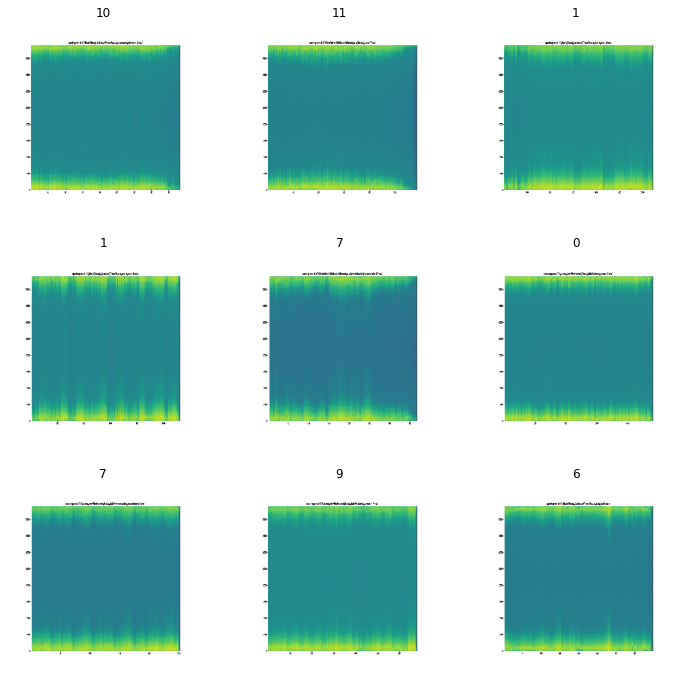

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [ ]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [ ]:
#from keras.regularizers import l2
from sklearn.model_selection import KFold
from tensorflow import keras
from keras.layers import Activation, Dense


# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH,3)))

#model.add(tf.keras.layers.Conv2D(16, 3,strides=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.Conv2D(32, 3,strides=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))

#model.add(tf.keras.layers.TimeDistributed(Conv2D(128, 3,strides=2, padding='same', activation='relu')))

#model.add(tf.keras.layers.ConvLSTM1D(8,3, return_sequences=True))
model.add(tf.keras.layers.ConvLSTM1D(16,3, return_sequences=True))
model.add(tf.keras.layers.ConvLSTM1D(32,3, return_sequences=True))
#model.add(tf.keras.layers.ConvLSTM1D(64,3, return_sequences=True))
#model.add(tf.keras.layers.LSTM(4, return_sequences=True, return_state=True))
#model.add(tf.keras.layers.LSTM(4, return_sequences=True, return_state=True))


model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))

#model.add(tf.keras.layers.TimeDistributed(Dense(128,activation='relu')))
#model.add(tf.keras.layers.TimeDistributed(Dense(64,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(Dense(32,activation='relu')))
model.add(tf.keras.layers.TimeDistributed(Dense(16,activation='relu')))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=15, validation_data=valid_dataset)

Epoch 1/15
4/4 [==============================] - 84s 18s/step - loss: 32.4032 - accuracy: 0.1154 - val_loss: 2.3873 - val_accuracy: 0.1481
Epoch 2/15
4/4 [==============================] - 74s 17s/step - loss: 3.6597 - accuracy: 0.0673 - val_loss: 2.3829 - val_accuracy: 0.0000e+00
Epoch 3/15
4/4 [==============================] - 74s 17s/step - loss: 2.6788 - accuracy: 0.0577 - val_loss: 2.4009 - val_accuracy: 0.0000e+00
Epoch 4/15
4/4 [==============================] - 75s 18s/step - loss: 2.5287 - accuracy: 0.0865 - val_loss: 2.4135 - val_accuracy: 0.0741
Epoch 5/15
4/4 [==============================] - 74s 17s/step - loss: 2.4435 - accuracy: 0.0673 - val_loss: 2.4064 - val_accuracy: 0.0741
Epoch 6/15
4/4 [==============================] - 74s 17s/step - loss: 2.4134 - accuracy: 0.1154 - val_loss: 2.4316 - val_accuracy: 0.0741
Epoch 7/15
4/4 [==============================] - 73s 17s/step - loss: 2.4123 - accuracy: 0.1250 - val_loss: 2.4198 - val_accuracy: 0.0741
Epoch 8/15
4/4 [==